# ARIMA Forecasting for Airlines Passenger Counts

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset


In [46]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url)
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month')

# Visualize the time series data

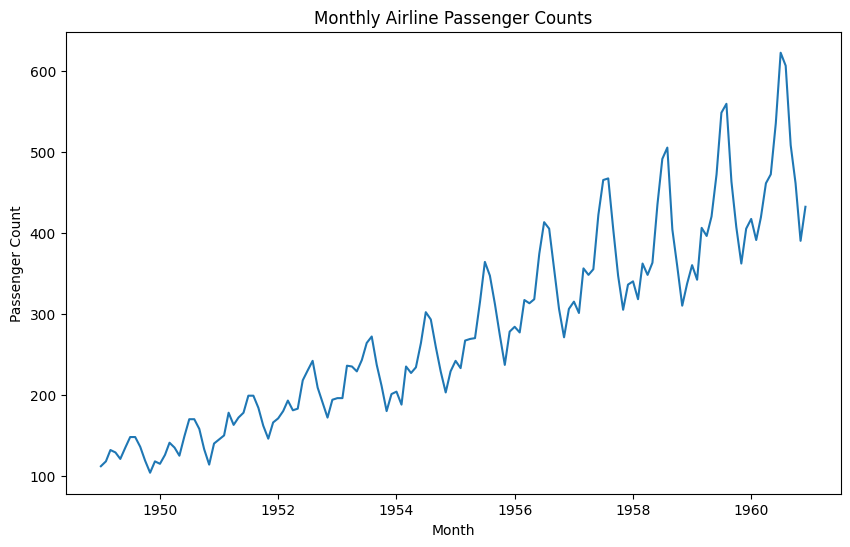

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Monthly Airline Passenger Counts')
plt.xlabel('Month')
plt.ylabel('Passenger Count')
plt.show()

# a) Identify ARIMA Order (p, d, q): Plot ACF and PACF


In [48]:
lag_acf = acf(data, nlags=20)
lag_pacf = pacf(data, nlags=20, method='ols')


# Plot Autocorrelation Function (ACF)


Text(0.5, 1.0, 'Autocorrelation Function')

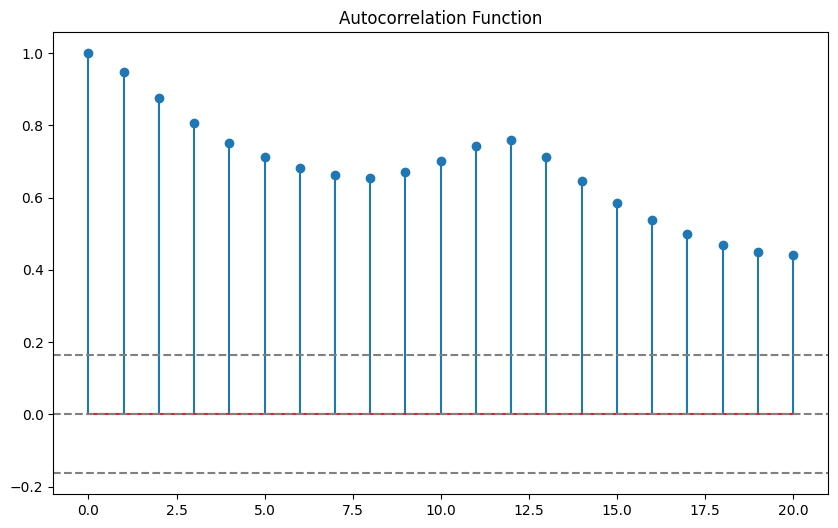

In [56]:
plt.figure(figsize=(10, 6))
plt.stem(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')


# Plot Partiacl Autocorrelation Function (PACF)

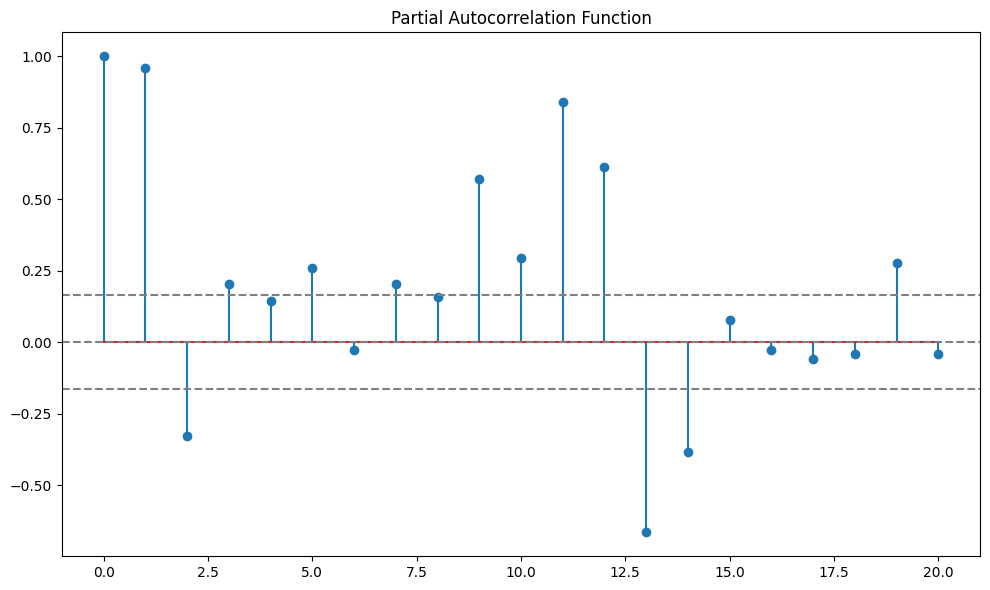

In [58]:
plt.figure(figsize=(10, 6))
plt.stem(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

# Manually identify the order (p, d, q) based on the plots


In [59]:
p = 3  # Example value, adjust based on ACF and PACF analysis
d = 1  # Example value, adjust based on differencing requirements
q = 2  # Example value, adjust based on ACF and PACF analysis


# b) Model Estimation: Fit ARIMA model to the training data and split the data into training and testing sets


In [60]:
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]


# Fit ARIMA model


In [61]:
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


# c) Model Evaluation: Evaluate the model's performance on the testing set and make predictions on the test set

In [62]:
predictions = model_fit.forecast(steps=len(test))


# Evaluate the model


In [63]:
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Squared Error (MSE): 6812.5041761989305
Root Mean Squared Error (RMSE): 82.53789539477567


# d) Forecasting: Generate forecasts for future time points


In [69]:
future_steps = 12  # Example value, adjust based on the forecasting horizon
forecast = model_fit.forecast(steps=future_steps, alpha=0.05)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


# Visualize the results


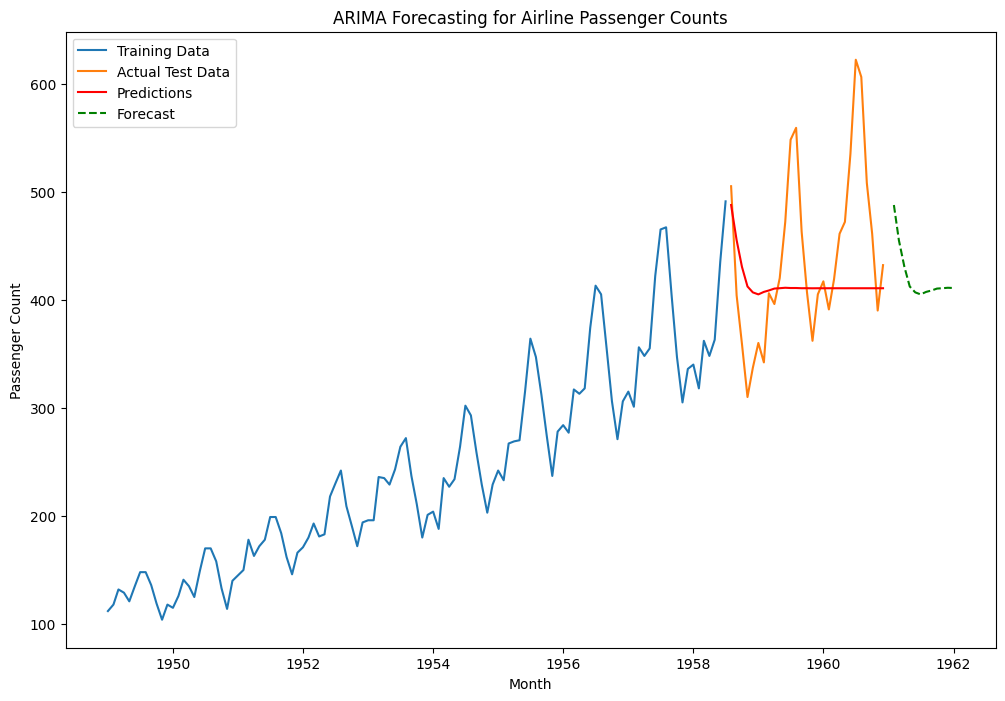

In [70]:
plt.figure(figsize=(12, 8))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.plot(pd.date_range(start=test.index[-1], periods=future_steps+1, freq='M')[1:], forecast, label='Forecast', linestyle='dashed', color='green')
plt.title('ARIMA Forecasting for Airline Passenger Counts')
plt.xlabel('Month')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()